# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0.1', axis=1)
diamonds = diamonds.drop('Unnamed: 0', axis=1)

In [9]:
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.405789,3.051101,61.749336,57.457029,3932.136079,5.732007,5.733335,3.539188
std,0.473986,1.701165,1.647109,1.432514,2.234064,3988.734835,1.119670,1.113960,0.692185
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,-7.816316,1.070000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,10.540000,8.060000


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [77]:
#your code here
df_describe = diamonds.groupby('color').describe()[['price']]

In [79]:
df_describe.columns

MultiIndex([('price', 'count'),
            ('price',  'mean'),
            ('price',   'std'),
            ('price',   'min'),
            ('price',   '25%'),
            ('price',   '50%'),
            ('price',   '75%'),
            ('price',   'max')],
           )

In [80]:
df_describe['iqr'] = df_describe[('price','75%')] - df_describe[('price','25%')] 

In [82]:
df_describe.sort_values(by='iqr', ascending=False)

price                                                            \
         count         mean          std    min     25%     50%      75%   
color                                                                      
1       5422.0  5091.874954  4722.387604  334.0  1120.5  3730.0  7201.75   
0       2808.0  5323.818020  4438.187251  335.0  1860.5  4234.0  7695.00   
3      11290.0  3998.145173  4050.552693  354.0   931.0  2241.5  6048.00   
2       8302.0  4484.958805  4213.822977  337.0   984.0  3455.5  5978.50   
4       9539.0  3725.091938  3785.495834  342.0   982.0  2344.0  4867.50   
6       6774.0  3168.106436  3353.391411  357.0   911.0  1836.5  4212.50   
5       9797.0  3076.752475  3344.158685  326.0   882.0  1739.0  4003.00   

                    iqr  
           max           
color                    
1      18823.0  6081.25  
0      18710.0  5834.50  
3      18818.0  5117.00  
2      18803.0  4994.50  
4      18791.0  3885.50  
6      18693.0  3301.50  
5      18731.0  3121.00

In [4]:
#your comments here
# the color 0 has the highest average price, and color 6 has the lowest price
# however, the min and max price are very similar for the 6 colors

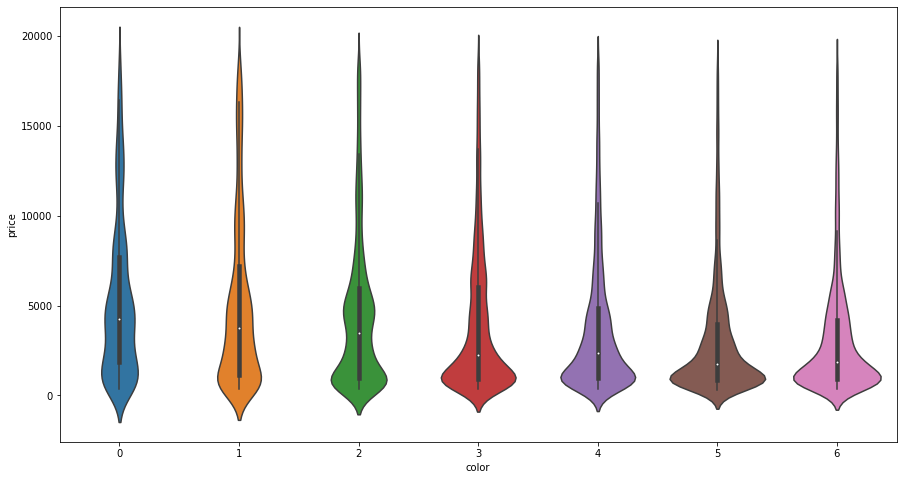

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="color", y="price", data=diamonds)

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#your hypotheses here
# i imagine the cut and the carats will impact the price the most 

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [17]:
#your code here
diamonds.groupby('color').mean()

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222730,3.845745
2,0.911627,2.933871,61.836557,57.518176,4484.958805,5.984776,5.978220,3.697786
3,0.771088,3.463419,61.757449,57.288060,3998.145173,5.678549,5.681198,3.506808
4,0.736509,3.134605,61.694087,57.433148,3725.091938,5.616727,5.620529,3.465774
5,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.415275,3.337750
6,0.657715,2.691025,61.698066,57.404355,3168.106436,5.417851,5.421928,3.343320


**What do you see? Pay special attention to the relationship between price and color.**

In [8]:
#your thoughts here
# the color 0 has the highest average price, and so on

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

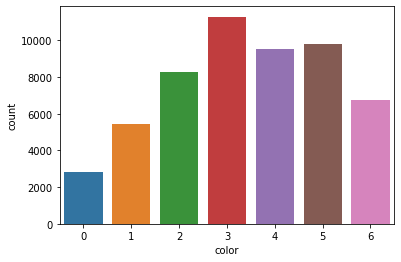

In [85]:
sns.countplot(x="color", data=diamonds)

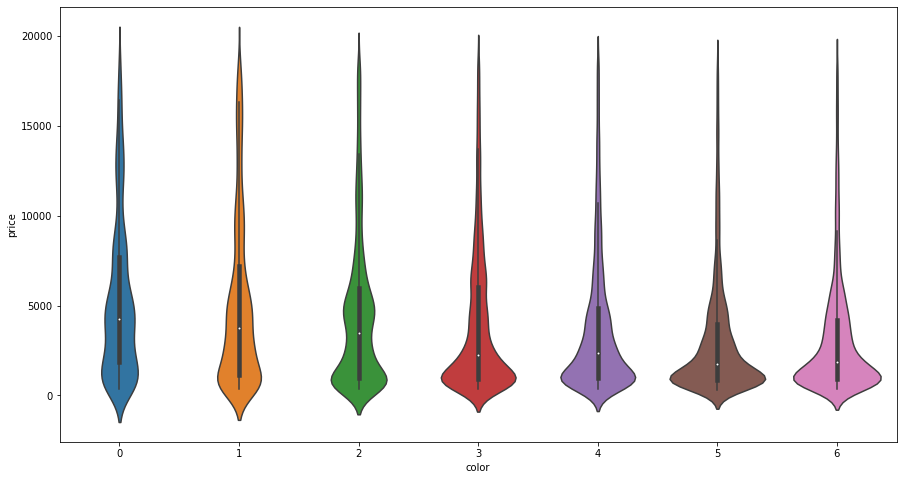

In [18]:
#your code here
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="color", y="price", data=diamonds)

In [10]:
#your comments here
# while the min and max don't change, 0 has more variability while 6 has the lowest variability and the smallest average price.

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [19]:
#your code here
diamonds.groupby('carat').mean()

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333
0.21,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222
0.22,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000
0.23,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468
0.24,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591
...,...,...,...,...,...,...,...,...
4.00,1.000000,0.000000,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000
4.01,0.500000,0.000000,61.750000,61.500000,15223.000000,10.080000,10.020000,6.205000
4.13,2.000000,0.000000,64.800000,61.000000,17329.000000,10.000000,9.850000,6.430000


In [13]:
#your comments
# the higher the carats, the higher the price -> not surprised


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

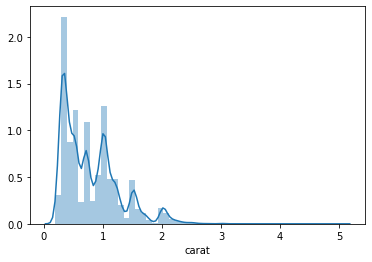

In [20]:
#your code here
sns.distplot(diamonds['carat'])

In [ ]:
# diamonds with lower carats are more common, while diamonds with higher carats are rarer

In [49]:
#diamonds['carat_bins'] = pd.cut(diamonds.carat, bins=10)

In [50]:
#diamonds.carat_bins.unique()

[(0.195, 0.681], (0.681, 1.162], (1.162, 1.643], (1.643, 2.124], (2.124, 2.605], (2.605, 3.086], (3.086, 3.567], (3.567, 4.048], (4.048, 4.529], (4.529, 5.01]]
Categories (10, interval[float64]): [(0.195, 0.681] < (0.681, 1.162] < (1.162, 1.643] < (1.643, 2.124] ... (3.086, 3.567] < (3.567, 4.048] < (4.048, 4.529] < (4.529, 5.01]]

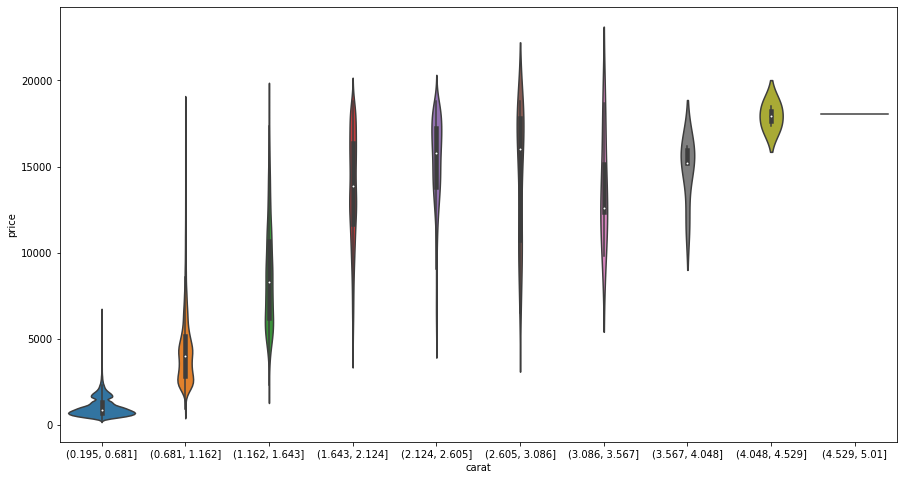

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.violinplot(x=pd.cut(diamonds.carat, bins=10), y="price", data=diamonds)

### 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [28]:
#your code here
diamonds.groupby('table').mean()

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.0400,1.0,4.00,62.90,4997.0,6.450,6.410,4.040
44.0,0.2900,5.0,4.00,62.80,474.0,4.200,4.240,2.650
49.0,0.6500,3.0,3.00,64.25,2290.5,5.355,5.320,3.425
50.0,1.5100,3.0,2.00,61.50,8995.5,7.380,7.295,4.510
50.1,0.9400,2.0,1.00,66.00,3353.0,6.130,6.170,4.060
...,...,...,...,...,...,...,...,...
71.0,0.6800,3.0,2.00,58.00,1633.0,5.850,5.700,3.350
73.0,0.6025,4.5,3.25,68.90,2406.5,5.520,5.465,3.745
76.0,0.7900,3.0,2.00,65.30,2362.0,5.520,5.130,3.350


In [18]:
#your comments here
# price does not seem directly linked to table -> need to analyze further 

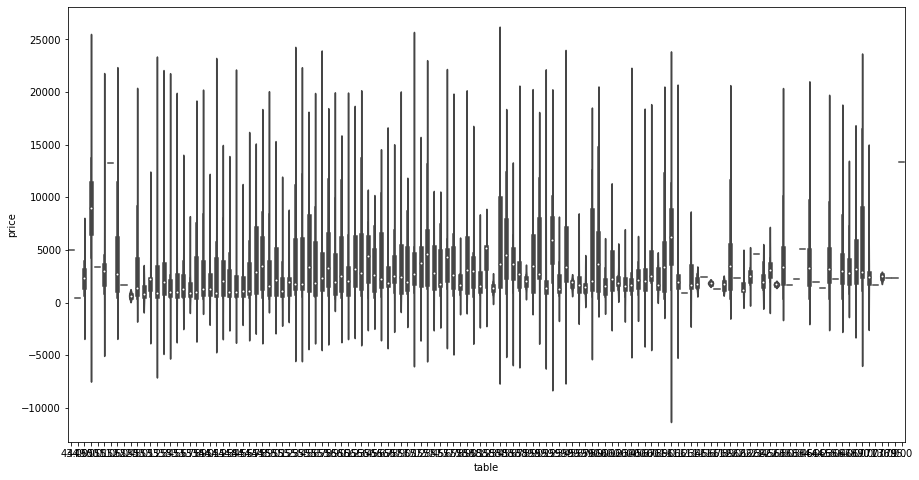

In [54]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="table", y="price", data=diamonds)

**Finally, do the same with the `clarity` column.**

In [30]:
#your code here
diamonds.groupby('clarity').mean()

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,6.709379,4.216954
1,1.077602,3.469967,61.771567,57.926823,5062.267356,6.404157,6.392630,3.951343
2,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640123
3,0.763850,3.494370,61.724249,57.418040,3924.166204,5.658633,5.659782,3.492384
4,0.727108,3.161812,61.667968,57.313966,3839.144308,5.572860,5.578009,3.437904
5,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465
6,0.503131,3.350848,61.624521,56.883881,2519.512315,4.961721,4.976437,3.062132
7,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659


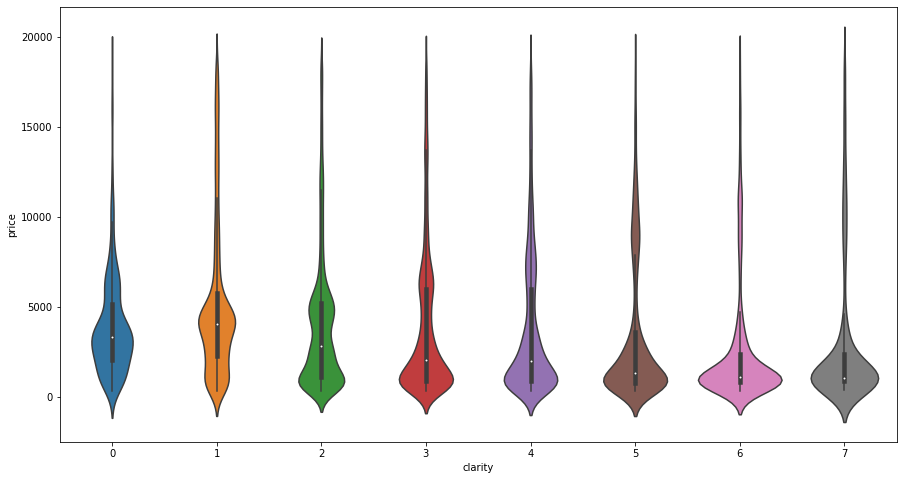

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="clarity", y="price", data=diamonds)

In [21]:
#your comments here
# don't see a strong correlation between clarity and price

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [23]:
#your thoughts here
# carats and color.
# i also made the hypothesis on cuts, but we did not analyze cuts yet

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


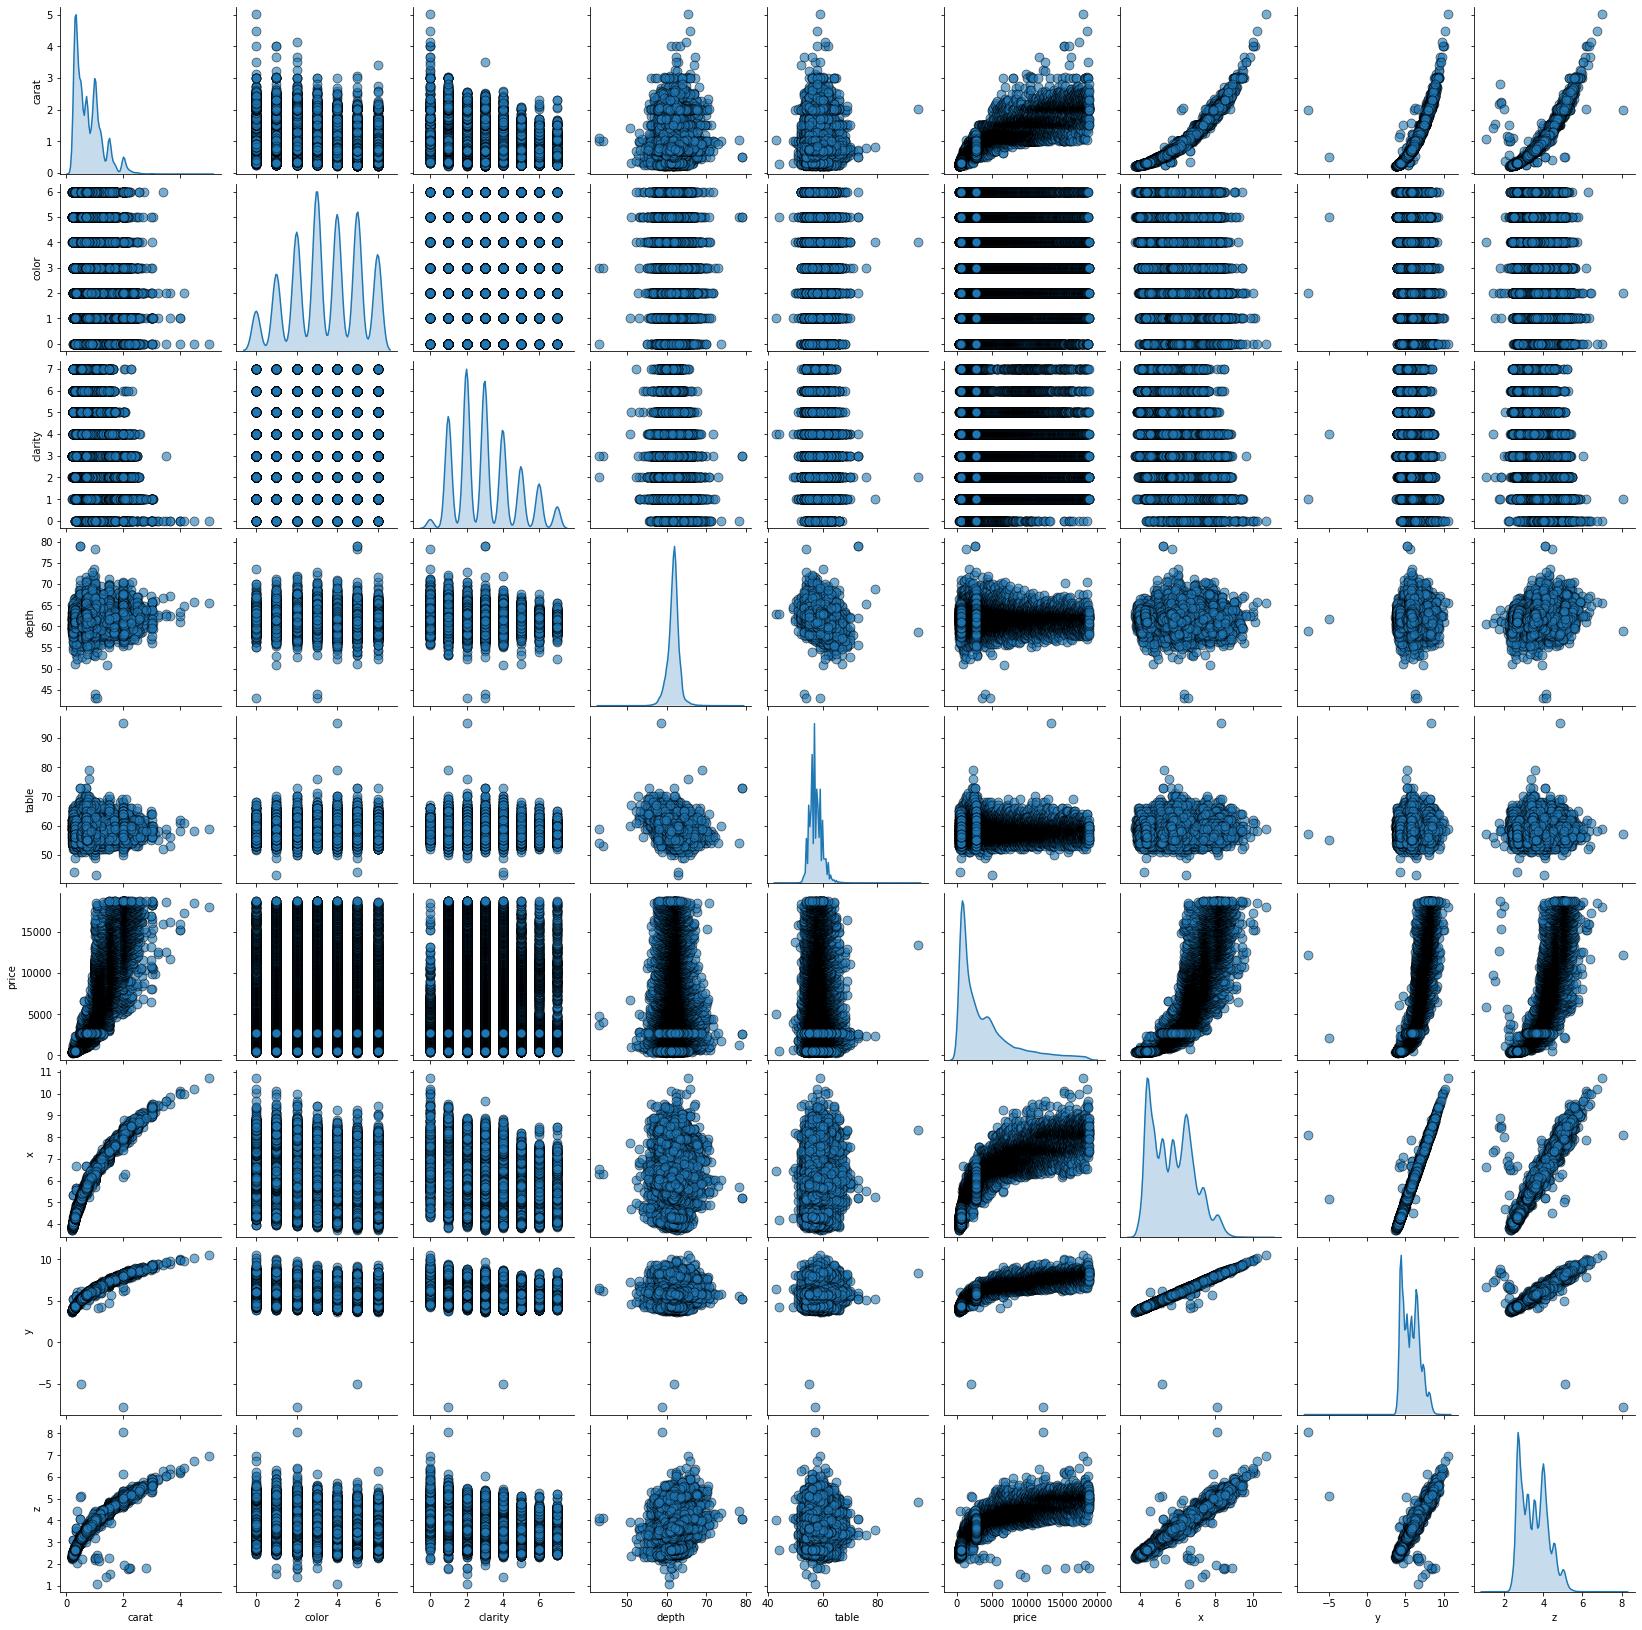

In [32]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
# carats with z, y, z -> makes sense
# price with carats and x,y,z
# the relation between x,y,z and price looks like a logarithm -> we can do a transformation with an exponential -> price has a linear relationship with the exponential of x, y, z

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

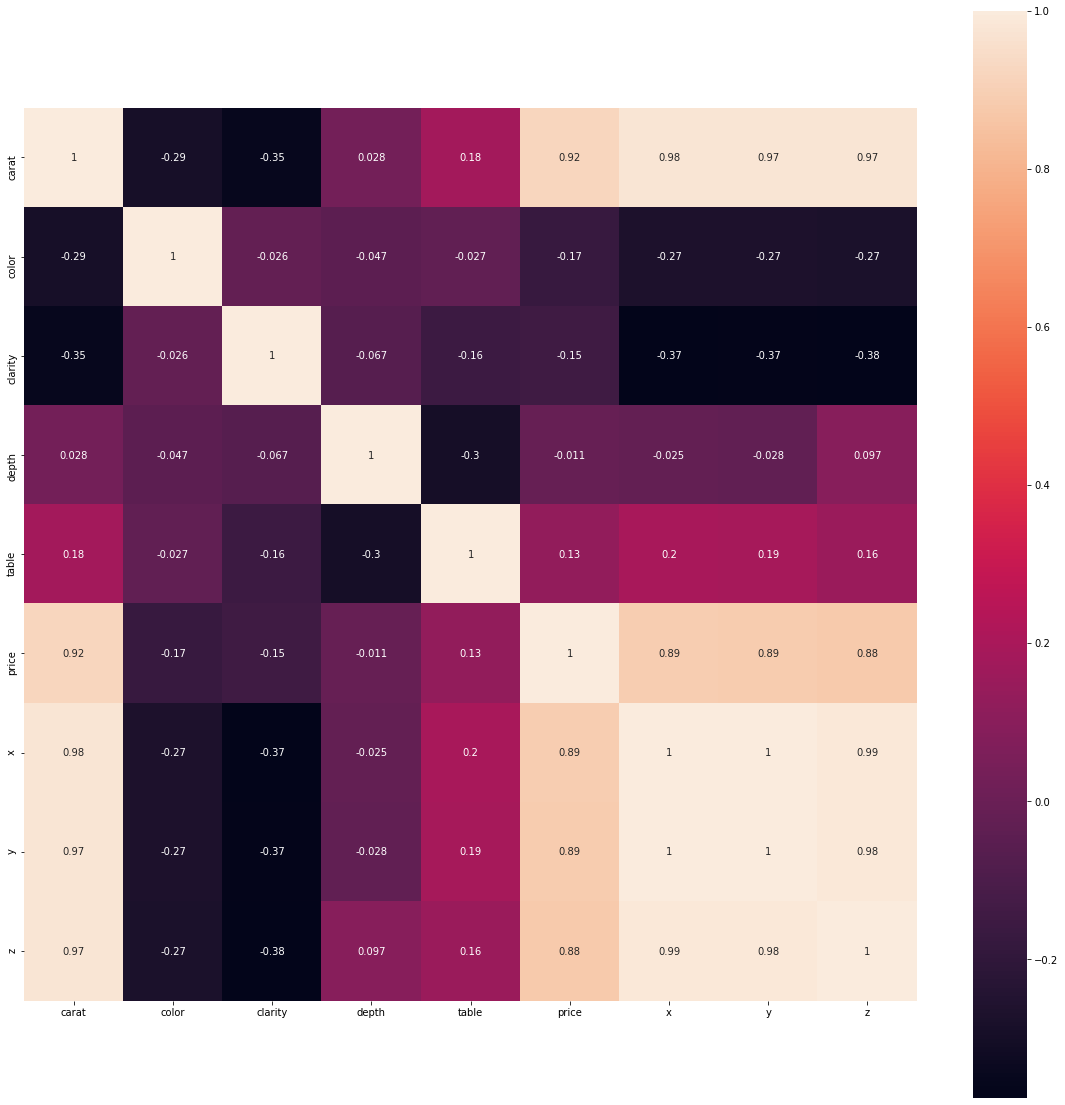

In [33]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [27]:
#your thoughts here
# same results as before.
# the relationship between price, carats, and x,y,z does not seem linear 

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

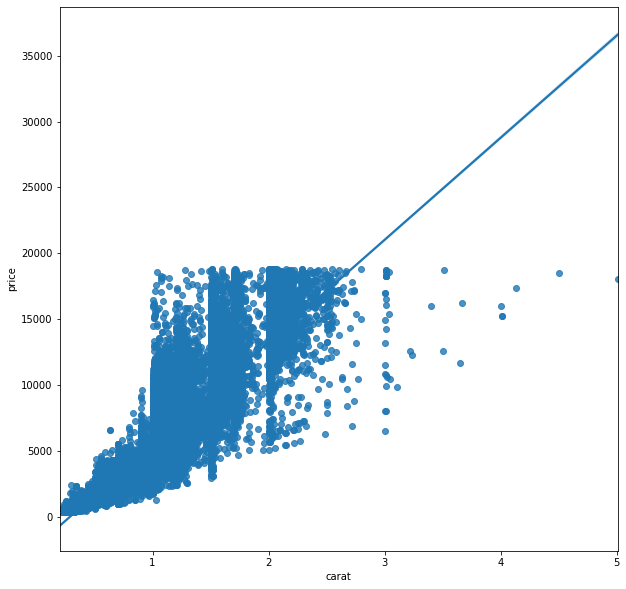

In [34]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [35]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8493658995804612

In [87]:
import statsmodels.api as sm
model = sm.OLS(diamonds.price,diamonds.carat)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          4.004e+05
Date:                Mon, 07 Sep 2020   Prob (F-statistic):                        0.00
Time:                        20:23:55   Log-Likelihood:                     -4.8453e+05
No. Observations:               53932   AIC:                                  9.691e+05
Df Residuals:                   53931   BIC:                                  9.691e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       5665.7482      8.954    632.760      0.000    5648.198    5683.298
==============================================================================
Omnibus:                    26103.809   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146381.756
Skew:                           2.340   Prob(JB):                         0.00
Kurtosis:                       9.576   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X = diamonds.carat

In [39]:
Y = diamonds.price

In [40]:
predictions = [intercept + slope*x for x in X]
residuals = [Y[i] - predictions[i] for i in range(len(Y))]

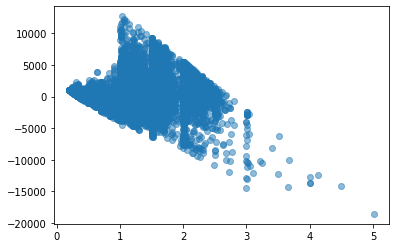

In [41]:
plt.scatter(X, residuals, alpha=0.5)

In [44]:
carat_residuals = pd.DataFrame ({'carat':X,'residuals':residuals})

In [45]:
carat_residuals['carat_bins'] = pd.cut(diamonds.carat, bins=10)

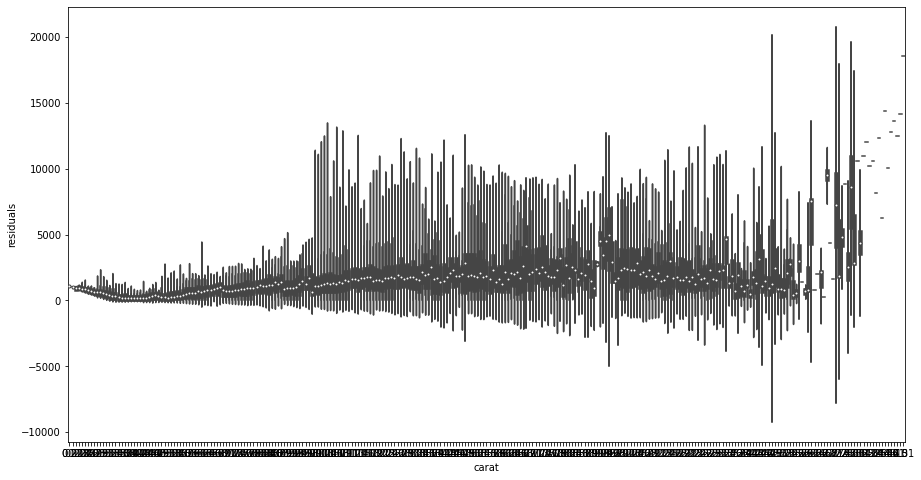

In [86]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="carat", y=abs(carat_residuals.residuals), data=carat_residuals)

**What do you think?**

In [30]:
#your thoughts here
# there is heteroskedasticity, so linear regression is not the best model to use

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [92]:
diamonds['x2'] = diamonds.x**2

In [95]:
diamonds['x3'] = diamonds.x**3

In [97]:
diamonds['expx'] = np.exp(diamonds.x)

In [102]:
diamonds.corr()[['carat']]

,carat
carat,1.000000
color,-0.291447
clarity,-0.352877
depth,0.028221
table,0.181658
price,0.921610
x,0.977765
y,0.974138
z,0.974381
x2,0.992108


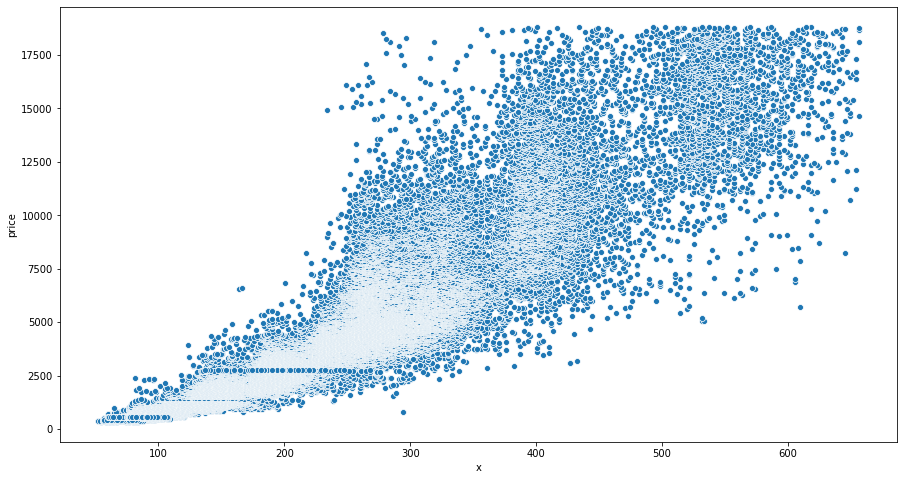

In [99]:
#your thoughts here
diamonds_filtered = diamonds[np.exp(diamonds.x)<6000]
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(x=np.power(diamonds.x,3), y="price", data=diamonds_filtered)

In [76]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds_filtered.x, diamonds_filtered.price)
r2 = r_value ** 2
r2

0.7843712343483918

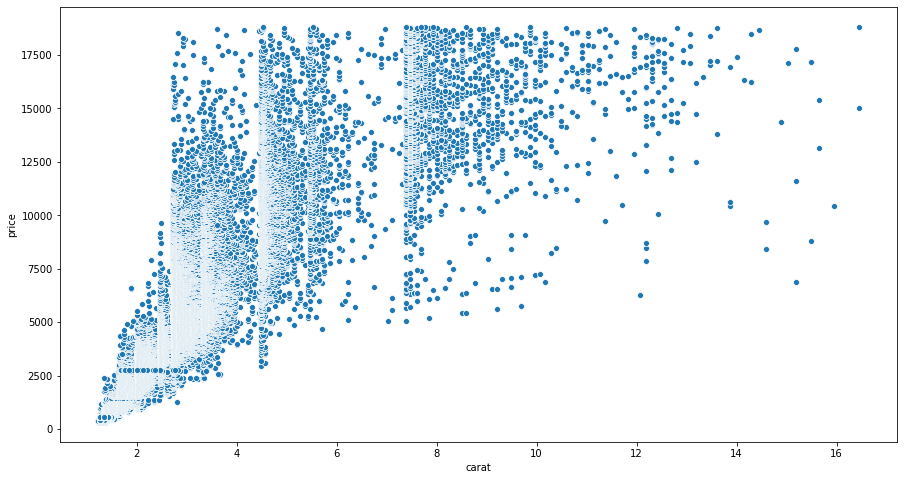

In [69]:
diamonds_filtered = diamonds[np.exp(diamonds.carat)<20]
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(x=np.exp(diamonds.carat), y="price", data=diamonds_filtered)

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.